<a href="https://colab.research.google.com/github/Vinit-1996/Finding-Best-Asset/blob/main/Find_Best_Asset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
from hurst import compute_Hc
import ta
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm
import matplotlib.pyplot as plt


## **HURST EXPONENT**

The Hurst exponent is a statistics that helps to understand the behavior of the time series.



*   0.5< Hurst <1 : Trending Movement

*   0.5 = Hurst : Random Walk
*   0<Hurst<0.5 : Antipersistent Movement






In [5]:
#Trending Example
arr = np.linspace(0,300,150) +100
hurst= compute_Hc(arr)


In [6]:
arr

array([100.        , 102.01342282, 104.02684564, 106.04026846,
       108.05369128, 110.06711409, 112.08053691, 114.09395973,
       116.10738255, 118.12080537, 120.13422819, 122.14765101,
       124.16107383, 126.17449664, 128.18791946, 130.20134228,
       132.2147651 , 134.22818792, 136.24161074, 138.25503356,
       140.26845638, 142.28187919, 144.29530201, 146.30872483,
       148.32214765, 150.33557047, 152.34899329, 154.36241611,
       156.37583893, 158.38926174, 160.40268456, 162.41610738,
       164.4295302 , 166.44295302, 168.45637584, 170.46979866,
       172.48322148, 174.4966443 , 176.51006711, 178.52348993,
       180.53691275, 182.55033557, 184.56375839, 186.57718121,
       188.59060403, 190.60402685, 192.61744966, 194.63087248,
       196.6442953 , 198.65771812, 200.67114094, 202.68456376,
       204.69798658, 206.7114094 , 208.72483221, 210.73825503,
       212.75167785, 214.76510067, 216.77852349, 218.79194631,
       220.80536913, 222.81879195, 224.83221477, 226.84

In [8]:
hurst[0]

0.9554899955081809

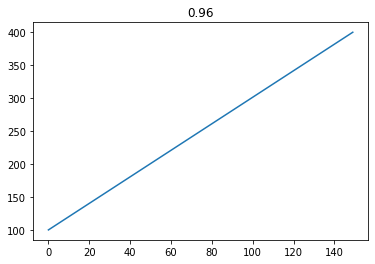

In [15]:
plt.plot(arr)
plt.title(f"{np.round(hurst[0],2)}")
plt.show()

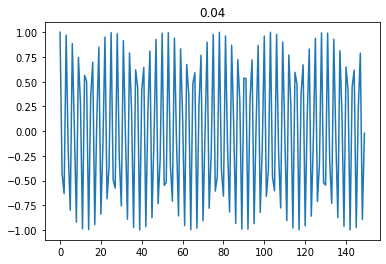

In [17]:
#Antipersistent
arr = np.cos(np.linspace(0,300,150))
hurst= compute_Hc(arr)[0]
plt.plot(arr)
plt.title(f"{np.round(hurst,2)}")
plt.show()

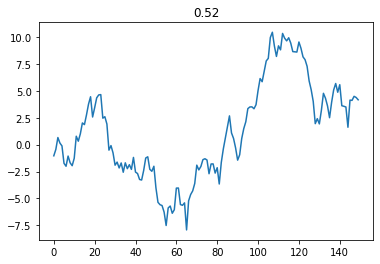

In [18]:
#Random Walk
np.random.seed(56)
arr = np.cumsum(np.random.randn(150))
hurst= compute_Hc(arr)[0]
plt.plot(arr)
plt.title(f"{np.round(hurst,2)}")
plt.show()

In [22]:
asset=pd.read_csv("/content/Names.csv")["Symbol"]

In [23]:
asset

0      EURUSD=X
1      EURGBP=X
2      EURCHF=X
3      EURCAD=X
4      EURCNY=X
         ...   
147        TCOM
148        INCY
149        CHKP
150        FOXA
151         FOX
Name: Symbol, Length: 152, dtype: object

In [24]:
Statistics=[]
col=[]

for fin in tqdm(asset):
  try:
    print(fin)

    f=yf.download(fin).dropna()

    statistics=list()
    #Compute Hurst
    statistics.append(compute_Hc(f["Adj Close"])[0])
    #Compute Volatility
    statistics.append(np.sqrt(252)*f["Adj Close"].dropna().pct_change(1).std())

    Statistics.append(statistics)

    col.append(fin)

  except:
    pass

resume=pd.DataFrame(Statistics, columns=["Hurst","Volatility"])

  0%|          | 0/152 [00:00<?, ?it/s]

EURUSD=X
[*********************100%***********************]  1 of 1 completed

  1%|          | 1/152 [00:00<01:17,  1.95it/s]


EURGBP=X
[*********************100%***********************]  1 of 1 completed

  1%|▏         | 2/152 [00:01<01:33,  1.61it/s]


EURCHF=X
[*********************100%***********************]  1 of 1 completed

  2%|▏         | 3/152 [00:01<01:12,  2.05it/s]


EURCAD=X
[*********************100%***********************]  1 of 1 completed

  3%|▎         | 4/152 [00:01<01:01,  2.41it/s]


EURCNY=X
[*********************100%***********************]  1 of 1 completed

  3%|▎         | 5/152 [00:02<00:55,  2.64it/s]


EURJPY=X
[*********************100%***********************]  1 of 1 completed

  4%|▍         | 6/152 [00:02<00:51,  2.83it/s]


EURSEK=X
[*********************100%***********************]  1 of 1 completed

  5%|▍         | 7/152 [00:03<01:03,  2.29it/s]


EURHUF=X
[*********************100%***********************]  1 of 1 completed

  5%|▌         | 8/152 [00:03<00:56,  2.53it/s]


GBPUSD=X
[*********************100%***********************]  1 of 1 completed

  6%|▌         | 9/152 [00:03<00:57,  2.50it/s]


GBPCNY=X
[*********************100%***********************]  1 of 1 completed

  7%|▋         | 10/152 [00:04<00:56,  2.51it/s]


GBPJPY=X
[*********************100%***********************]  1 of 1 completed

  7%|▋         | 11/152 [00:04<01:03,  2.23it/s]


USDCHF=X
[*********************100%***********************]  1 of 1 completed

  8%|▊         | 12/152 [00:05<00:59,  2.35it/s]


USDCAD=X
[*********************100%***********************]  1 of 1 completed

  9%|▊         | 13/152 [00:06<01:24,  1.64it/s]


USDCNY=X
[*********************100%***********************]  1 of 1 completed

  9%|▉         | 14/152 [00:06<01:13,  1.88it/s]


USDHKD=X
[*********************100%***********************]  1 of 1 completed

 10%|▉         | 15/152 [00:07<01:27,  1.57it/s]


USDSGD=X
[*********************100%***********************]  1 of 1 completed

 11%|█         | 16/152 [00:07<01:21,  1.66it/s]


USDINR=X
[*********************100%***********************]  1 of 1 completed

 11%|█         | 17/152 [00:08<01:14,  1.81it/s]


USDMXN=X
[*********************100%***********************]  1 of 1 completed

 12%|█▏        | 18/152 [00:08<01:08,  1.95it/s]


USDPHP=X
[*********************100%***********************]  1 of 1 completed

 12%|█▎        | 19/152 [00:09<01:11,  1.87it/s]


USDTHB=X
[*********************100%***********************]  1 of 1 completed

 13%|█▎        | 20/152 [00:09<01:00,  2.18it/s]


USDMYR=X
[*********************100%***********************]  1 of 1 completed

 14%|█▍        | 21/152 [00:09<00:54,  2.39it/s]


USDZAR=X
[*********************100%***********************]  1 of 1 completed

 14%|█▍        | 22/152 [00:10<00:55,  2.36it/s]


USDJPY=X
[*********************100%***********************]  1 of 1 completed

 15%|█▌        | 23/152 [00:10<00:51,  2.50it/s]


AUDJPY=X
[*********************100%***********************]  1 of 1 completed

 16%|█▌        | 24/152 [00:11<01:03,  2.02it/s]


NZDUSD=X
[*********************100%***********************]  1 of 1 completed

 16%|█▋        | 25/152 [00:11<00:57,  2.20it/s]


BTC-USD
[*********************100%***********************]  1 of 1 completed

 17%|█▋        | 26/152 [00:12<00:49,  2.57it/s]


ETH-USD
[*********************100%***********************]  1 of 1 completed

 18%|█▊        | 27/152 [00:12<00:42,  2.92it/s]


BNB-USD
[*********************100%***********************]  1 of 1 completed


 18%|█▊        | 28/152 [00:12<00:36,  3.36it/s]

USDT-USD
[*********************100%***********************]  1 of 1 completed

 19%|█▉        | 29/152 [00:12<00:34,  3.52it/s]


XRP-USD
[*********************100%***********************]  1 of 1 completed

 20%|█▉        | 30/152 [00:12<00:33,  3.61it/s]


ADA-USD
[*********************100%***********************]  1 of 1 completed

 20%|██        | 31/152 [00:13<00:30,  3.92it/s]


DOGE-USD
[*********************100%***********************]  1 of 1 completed

 21%|██        | 32/152 [00:13<00:32,  3.74it/s]


DOT1-USD
[*********************100%***********************]  1 of 1 completed

 22%|██▏       | 33/152 [00:13<00:27,  4.35it/s]


UNI3-USD
[*********************100%***********************]  1 of 1 completed

 22%|██▏       | 34/152 [00:13<00:23,  4.99it/s]


LTC-USD
[*********************100%***********************]  1 of 1 completed

 23%|██▎       | 35/152 [00:14<00:26,  4.47it/s]


BCH-USD
[*********************100%***********************]  1 of 1 completed

 24%|██▎       | 36/152 [00:14<00:28,  4.12it/s]


LINK-USD
[*********************100%***********************]  1 of 1 completed

 24%|██▍       | 37/152 [00:14<00:28,  4.07it/s]


VET-USD
[*********************100%***********************]  1 of 1 completed


 25%|██▌       | 38/152 [00:14<00:26,  4.37it/s]

USDC-USD
[*********************100%***********************]  1 of 1 completed

 26%|██▌       | 39/152 [00:15<00:33,  3.42it/s]


SOL1-USD
[*********************100%***********************]  1 of 1 completed

 26%|██▋       | 40/152 [00:15<00:27,  4.02it/s]


XLM-USD
[*********************100%***********************]  1 of 1 completed

 27%|██▋       | 41/152 [00:15<00:27,  4.06it/s]


FIL-USD
[*********************100%***********************]  1 of 1 completed

 28%|██▊       | 42/152 [00:15<00:28,  3.92it/s]


THETA-USD
[*********************100%***********************]  1 of 1 completed

 28%|██▊       | 43/152 [00:16<00:27,  3.96it/s]


TRX-USD
[*********************100%***********************]  1 of 1 completed


 29%|██▉       | 44/152 [00:16<00:25,  4.21it/s]

XMR-USD
[*********************100%***********************]  1 of 1 completed

 30%|██▉       | 45/152 [00:16<00:32,  3.29it/s]


LUNA1-USD
[*********************100%***********************]  1 of 1 completed

 30%|███       | 46/152 [00:17<00:33,  3.14it/s]


NEO-USD
[*********************100%***********************]  1 of 1 completed

 31%|███       | 47/152 [00:17<00:36,  2.91it/s]


EOS-USD
[*********************100%***********************]  1 of 1 completed

 32%|███▏      | 48/152 [00:17<00:31,  3.34it/s]


MIOTA-USD
[*********************100%***********************]  1 of 1 completed

 32%|███▏      | 49/152 [00:17<00:28,  3.59it/s]


BSV-USD
[*********************100%***********************]  1 of 1 completed


 33%|███▎      | 50/152 [00:18<00:25,  4.04it/s]

AAPL
[*********************100%***********************]  1 of 1 completed

 34%|███▎      | 51/152 [00:18<00:40,  2.50it/s]


MSFT
[*********************100%***********************]  1 of 1 completed

 34%|███▍      | 52/152 [00:19<00:46,  2.17it/s]


AMZN
[*********************100%***********************]  1 of 1 completed

 35%|███▍      | 53/152 [00:19<00:45,  2.16it/s]


TSLA
[*********************100%***********************]  1 of 1 completed

 36%|███▌      | 54/152 [00:20<00:40,  2.39it/s]


FB
[*********************100%***********************]  1 of 1 completed

 36%|███▌      | 55/152 [00:20<00:34,  2.79it/s]


GOOG
[*********************100%***********************]  1 of 1 completed

 37%|███▋      | 56/152 [00:21<00:40,  2.40it/s]


GOOGL
[*********************100%***********************]  1 of 1 completed

 38%|███▊      | 57/152 [00:21<00:45,  2.10it/s]


NVDA
[*********************100%***********************]  1 of 1 completed

 38%|███▊      | 58/152 [00:22<00:42,  2.20it/s]


PYPL
[*********************100%***********************]  1 of 1 completed

 39%|███▉      | 59/152 [00:22<00:38,  2.43it/s]


INTC
[*********************100%***********************]  1 of 1 completed

 39%|███▉      | 60/152 [00:22<00:39,  2.33it/s]


CMCSA
[*********************100%***********************]  1 of 1 completed

 40%|████      | 61/152 [00:23<00:47,  1.93it/s]


NFLX
[*********************100%***********************]  1 of 1 completed

 41%|████      | 62/152 [00:24<00:45,  1.96it/s]


ADBE
[*********************100%***********************]  1 of 1 completed

 41%|████▏     | 63/152 [00:24<00:45,  1.97it/s]


CSCO
[*********************100%***********************]  1 of 1 completed

 42%|████▏     | 64/152 [00:24<00:40,  2.18it/s]


PEP
[*********************100%***********************]  1 of 1 completed

 43%|████▎     | 65/152 [00:25<00:44,  1.94it/s]


AVGO
[*********************100%***********************]  1 of 1 completed

 43%|████▎     | 66/152 [00:25<00:37,  2.30it/s]


TXN
[*********************100%***********************]  1 of 1 completed

 44%|████▍     | 67/152 [00:27<00:58,  1.45it/s]


TMUS
[*********************100%***********************]  1 of 1 completed

 45%|████▍     | 68/152 [00:27<00:46,  1.81it/s]


COST
[*********************100%***********************]  1 of 1 completed

 45%|████▌     | 69/152 [00:27<00:42,  1.93it/s]


QCOM
[*********************100%***********************]  1 of 1 completed

 46%|████▌     | 70/152 [00:28<00:47,  1.72it/s]


AMGN
[*********************100%***********************]  1 of 1 completed

 47%|████▋     | 71/152 [00:28<00:42,  1.89it/s]


SBUX
[*********************100%***********************]  1 of 1 completed

 47%|████▋     | 72/152 [00:29<00:41,  1.94it/s]


AMAT
[*********************100%***********************]  1 of 1 completed

 48%|████▊     | 73/152 [00:29<00:39,  1.99it/s]


CHTR
[*********************100%***********************]  1 of 1 completed

 49%|████▊     | 74/152 [00:30<00:32,  2.38it/s]


INTU
[*********************100%***********************]  1 of 1 completed

 49%|████▉     | 75/152 [00:30<00:31,  2.41it/s]


MU
[*********************100%***********************]  1 of 1 completed

 50%|█████     | 76/152 [00:30<00:31,  2.39it/s]


BKNG
[*********************100%***********************]  1 of 1 completed

 51%|█████     | 77/152 [00:31<00:32,  2.30it/s]


AMD
[*********************100%***********************]  1 of 1 completed

 51%|█████▏    | 78/152 [00:31<00:33,  2.22it/s]


LRCX
[*********************100%***********************]  1 of 1 completed

 52%|█████▏    | 79/152 [00:32<00:31,  2.28it/s]


ISRG
[*********************100%***********************]  1 of 1 completed

 53%|█████▎    | 80/152 [00:32<00:29,  2.42it/s]


MDLZ
[*********************100%***********************]  1 of 1 completed

 53%|█████▎    | 81/152 [00:33<00:49,  1.44it/s]


GILD
[*********************100%***********************]  1 of 1 completed

 54%|█████▍    | 82/152 [00:34<00:45,  1.53it/s]


FISV
[*********************100%***********************]  1 of 1 completed

 55%|█████▍    | 83/152 [00:35<00:42,  1.64it/s]


ADP
[*********************100%***********************]  1 of 1 completed

 55%|█████▌    | 84/152 [00:35<00:41,  1.64it/s]


ZM
[*********************100%***********************]  1 of 1 completed

 56%|█████▌    | 85/152 [00:35<00:34,  1.95it/s]


MELI
[*********************100%***********************]  1 of 1 completed

 57%|█████▋    | 86/152 [00:36<00:29,  2.27it/s]


ATVI
[*********************100%***********************]  1 of 1 completed

 57%|█████▋    | 87/152 [00:36<00:27,  2.36it/s]


CSX
[*********************100%***********************]  1 of 1 completed

 58%|█████▊    | 88/152 [00:37<00:29,  2.20it/s]


JD
[*********************100%***********************]  1 of 1 completed

 59%|█████▊    | 89/152 [00:37<00:25,  2.45it/s]


ADSK
[*********************100%***********************]  1 of 1 completed

 59%|█████▉    | 90/152 [00:38<00:28,  2.15it/s]


BIDU
[*********************100%***********************]  1 of 1 completed

 60%|█████▉    | 91/152 [00:38<00:24,  2.48it/s]


ILMN
[*********************100%***********************]  1 of 1 completed

 61%|██████    | 92/152 [00:38<00:25,  2.37it/s]


ADI
[*********************100%***********************]  1 of 1 completed

 61%|██████    | 93/152 [00:39<00:25,  2.27it/s]


NXPI
[*********************100%***********************]  1 of 1 completed

 62%|██████▏   | 94/152 [00:39<00:25,  2.29it/s]


VRTX
[*********************100%***********************]  1 of 1 completed

 62%|██████▎   | 95/152 [00:40<00:27,  2.10it/s]


KLAC
[*********************100%***********************]  1 of 1 completed

 63%|██████▎   | 96/152 [00:40<00:27,  2.02it/s]


MRNA
[*********************100%***********************]  1 of 1 completed

 64%|██████▍   | 97/152 [00:40<00:22,  2.47it/s]


PDD
[*********************100%***********************]  1 of 1 completed

 64%|██████▍   | 98/152 [00:41<00:18,  2.85it/s]


REGN
[*********************100%***********************]  1 of 1 completed

 65%|██████▌   | 99/152 [00:41<00:19,  2.77it/s]


KHC
[*********************100%***********************]  1 of 1 completed

 66%|██████▌   | 100/152 [00:41<00:16,  3.17it/s]


MNST
[*********************100%***********************]  1 of 1 completed

 66%|██████▋   | 101/152 [00:42<00:19,  2.66it/s]


KDP
[*********************100%***********************]  1 of 1 completed

 67%|██████▋   | 102/152 [00:42<00:16,  2.95it/s]


MAR
[*********************100%***********************]  1 of 1 completed

 68%|██████▊   | 103/152 [00:42<00:16,  2.90it/s]


ASML
[*********************100%***********************]  1 of 1 completed

 68%|██████▊   | 104/152 [00:43<00:19,  2.42it/s]


WBA
[*********************100%***********************]  1 of 1 completed

 69%|██████▉   | 105/152 [00:44<00:21,  2.19it/s]


WDAY
[*********************100%***********************]  1 of 1 completed

 70%|██████▉   | 106/152 [00:44<00:17,  2.58it/s]


ROST
[*********************100%***********************]  1 of 1 completed

 70%|███████   | 107/152 [00:44<00:18,  2.39it/s]


ALGN
[*********************100%***********************]  1 of 1 completed

 71%|███████   | 108/152 [00:45<00:17,  2.58it/s]


EXC
[*********************100%***********************]  1 of 1 completed

 72%|███████▏  | 109/152 [00:45<00:21,  1.97it/s]


MCHP
[*********************100%***********************]  1 of 1 completed

 72%|███████▏  | 110/152 [00:46<00:19,  2.11it/s]


AEP
[*********************100%***********************]  1 of 1 completed

 73%|███████▎  | 111/152 [00:46<00:22,  1.84it/s]


EBAY
[*********************100%***********************]  1 of 1 completed

 74%|███████▎  | 112/152 [00:47<00:25,  1.56it/s]


CTSH
[*********************100%***********************]  1 of 1 completed

 74%|███████▍  | 113/152 [00:48<00:21,  1.84it/s]


IDXX
[*********************100%***********************]  1 of 1 completed

 75%|███████▌  | 114/152 [00:48<00:19,  1.97it/s]


BIIB
[*********************100%***********************]  1 of 1 completed

 76%|███████▌  | 115/152 [00:48<00:17,  2.12it/s]


EA
[*********************100%***********************]  1 of 1 completed

 76%|███████▋  | 116/152 [00:49<00:16,  2.24it/s]


CDNS
[*********************100%***********************]  1 of 1 completed

 77%|███████▋  | 117/152 [00:49<00:15,  2.25it/s]


SNPS
[*********************100%***********************]  1 of 1 completed

 78%|███████▊  | 118/152 [00:50<00:14,  2.37it/s]


LULU
[*********************100%***********************]  1 of 1 completed

 78%|███████▊  | 119/152 [00:50<00:12,  2.69it/s]


MTCH
[*********************100%***********************]  1 of 1 completed

 79%|███████▉  | 120/152 [00:51<00:14,  2.22it/s]


DOCU
[*********************100%***********************]  1 of 1 completed

 80%|███████▉  | 121/152 [00:51<00:11,  2.63it/s]


XEL
[*********************100%***********************]  1 of 1 completed

 80%|████████  | 122/152 [00:51<00:13,  2.27it/s]


CTAS
[*********************100%***********************]  1 of 1 completed

 81%|████████  | 123/152 [00:52<00:13,  2.14it/s]


ORLY
[*********************100%***********************]  1 of 1 completed

 82%|████████▏ | 124/152 [00:52<00:12,  2.16it/s]


DXCM
[*********************100%***********************]  1 of 1 completed

 82%|████████▏ | 125/152 [00:53<00:10,  2.46it/s]


PAYX
[*********************100%***********************]  1 of 1 completed

 83%|████████▎ | 126/152 [00:53<00:12,  2.01it/s]


MRVL
[*********************100%***********************]  1 of 1 completed

 84%|████████▎ | 127/152 [00:54<00:10,  2.30it/s]


ALXN
[*********************100%***********************]  1 of 1 completed

 84%|████████▍ | 128/152 [00:54<00:08,  2.72it/s]



1 Failed download:
- ALXN: No data found, symbol may be delisted
PCAR
[*********************100%***********************]  1 of 1 completed

 85%|████████▍ | 129/152 [00:55<00:12,  1.87it/s]


NTES
[*********************100%***********************]  1 of 1 completed

 86%|████████▌ | 130/152 [00:55<00:12,  1.77it/s]


XLNX
[*********************100%***********************]  1 of 1 completed

 86%|████████▌ | 131/152 [00:56<00:11,  1.80it/s]


SWKS
[*********************100%***********************]  1 of 1 completed

 87%|████████▋ | 132/152 [00:57<00:11,  1.74it/s]


ANSS
[*********************100%***********************]  1 of 1 completed

 88%|████████▊ | 133/152 [00:57<00:09,  1.93it/s]


PTON
[*********************100%***********************]  1 of 1 completed

 88%|████████▊ | 134/152 [00:57<00:07,  2.35it/s]


TEAM
[*********************100%***********************]  1 of 1 completed

 89%|████████▉ | 135/152 [00:57<00:05,  2.84it/s]


VRSK
[*********************100%***********************]  1 of 1 completed

 89%|████████▉ | 136/152 [00:58<00:05,  2.99it/s]


FAST
[*********************100%***********************]  1 of 1 completed

 90%|█████████ | 137/152 [00:58<00:07,  2.09it/s]


OKTA
[*********************100%***********************]  1 of 1 completed

 91%|█████████ | 138/152 [00:59<00:05,  2.57it/s]


DLTR
[*********************100%***********************]  1 of 1 completed

 91%|█████████▏| 139/152 [00:59<00:05,  2.27it/s]


CPRT
[*********************100%***********************]  1 of 1 completed

 92%|█████████▏| 140/152 [01:00<00:05,  2.03it/s]


SGEN
[*********************100%***********************]  1 of 1 completed

 93%|█████████▎| 141/152 [01:00<00:05,  1.89it/s]


SIRI
[*********************100%***********************]  1 of 1 completed

 93%|█████████▎| 142/152 [01:01<00:05,  1.97it/s]


MXIM
[*********************100%***********************]  1 of 1 completed

 94%|█████████▍| 143/152 [01:01<00:03,  2.42it/s]



1 Failed download:
- MXIM: No data found, symbol may be delisted
CDW
[*********************100%***********************]  1 of 1 completed

 95%|█████████▍| 144/152 [01:01<00:02,  2.68it/s]


VRSN
[*********************100%***********************]  1 of 1 completed

 95%|█████████▌| 145/152 [01:02<00:02,  2.82it/s]


SPLK
[*********************100%***********************]  1 of 1 completed

 96%|█████████▌| 146/152 [01:02<00:02,  2.64it/s]


CERN
[*********************100%***********************]  1 of 1 completed

 97%|█████████▋| 147/152 [01:03<00:02,  2.10it/s]


TCOM
[*********************100%***********************]  1 of 1 completed

 97%|█████████▋| 148/152 [01:03<00:02,  1.92it/s]


INCY
[*********************100%***********************]  1 of 1 completed

 98%|█████████▊| 149/152 [01:04<00:01,  1.75it/s]


CHKP
[*********************100%***********************]  1 of 1 completed

 99%|█████████▊| 150/152 [01:05<00:01,  1.76it/s]


FOXA
[*********************100%***********************]  1 of 1 completed

 99%|█████████▉| 151/152 [01:05<00:00,  2.25it/s]


FOX
[*********************100%***********************]  1 of 1 completed

100%|██████████| 152/152 [01:05<00:00,  2.32it/s]

In [26]:
resume.index=col

In [27]:
resume

,Hurst,Volatility
EURUSD=X,0.438576,0.117175
EURGBP=X,0.514394,0.082757
EURCHF=X,0.541235,0.078822
EURCAD=X,0.453118,0.092222
EURCNY=X,0.459822,0.130520
...,...,...
TCOM,0.526031,0.505328
INCY,0.507449,0.659017
CHKP,0.487680,0.521470
FOXA,0.522020,0.390218


In [29]:
clustering=pd.read_csv("/content/Names.csv",index_col="Symbol")
del clustering["Unnamed: 0"]

In [30]:
clustering

,dummy
Symbol,
EURUSD=X,Currency
EURGBP=X,Currency
EURCHF=X,Currency
EURCAD=X,Currency
EURCNY=X,Currency
...,...
TCOM,Asset
INCY,Asset
CHKP,Asset


In [31]:
g=pd.concat((resume,clustering),axis=1).dropna()

In [32]:
g

,Hurst,Volatility,dummy
EURUSD=X,0.438576,0.117175,Currency
EURGBP=X,0.514394,0.082757,Currency
EURCHF=X,0.541235,0.078822,Currency
EURCAD=X,0.453118,0.092222,Currency
EURCNY=X,0.459822,0.130520,Currency
...,...,...,...
TCOM,0.526031,0.505328,Asset
INCY,0.507449,0.659017,Asset
CHKP,0.487680,0.521470,Asset
FOXA,0.522020,0.390218,Asset


In [33]:
#Describe by Currency
g.loc[g["dummy"]=="Currency"].describe().T

,count,mean,std,min,25%,50%,75%,max
Hurst,25.0,0.504489,0.051194,0.394302,0.469766,0.497772,0.541235,0.643448
Volatility,25.0,0.100243,0.035910,0.010877,0.081992,0.095324,0.125457,0.174093


In [34]:
g.loc[g["dummy"]=="Crypto"].describe().T

,count,mean,std,min,25%,50%,75%,max
Hurst,25.0,0.521028,0.053046,0.397210,0.495839,0.521347,0.547001,0.660597
Volatility,25.0,1.511578,1.617799,0.070616,1.117807,1.265861,1.394566,8.957520


In [35]:
g.loc[g["dummy"]=="Asset"].describe().T

,count,mean,std,min,25%,50%,75%,max
Hurst,100.0,0.563818,0.037361,0.487680,0.537034,0.563130,0.590391,0.655765
Volatility,100.0,0.459068,0.136485,0.207871,0.356920,0.464451,0.548511,0.818008


In [36]:
g.describe()

,Hurst,Volatility
count,150.000000,150.000000
mean,0.546798,0.574682
std,0.049082,0.792575
min,0.394302,0.010877
25%,0.514705,0.289159
50%,0.547528,0.453165
75%,0.578998,0.584399
max,0.660597,8.957520


In [37]:
g["Hurst_dum"]="Low"
g.loc[g["Hurst"]>0.55,"Hurst_dum"]="High"

In [38]:
g

,Hurst,Volatility,dummy,Hurst_dum
EURUSD=X,0.438576,0.117175,Currency,Low
EURGBP=X,0.514394,0.082757,Currency,Low
EURCHF=X,0.541235,0.078822,Currency,Low
EURCAD=X,0.453118,0.092222,Currency,Low
EURCNY=X,0.459822,0.130520,Currency,Low
...,...,...,...,...
TCOM,0.526031,0.505328,Asset,Low
INCY,0.507449,0.659017,Asset,Low
CHKP,0.487680,0.521470,Asset,Low
FOXA,0.522020,0.390218,Asset,Low
